In [45]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [47]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
# predicting the target feature - Species using the 4 variables(features) - sepal length, sepal_width, petal_length and petal_width

In [50]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [51]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

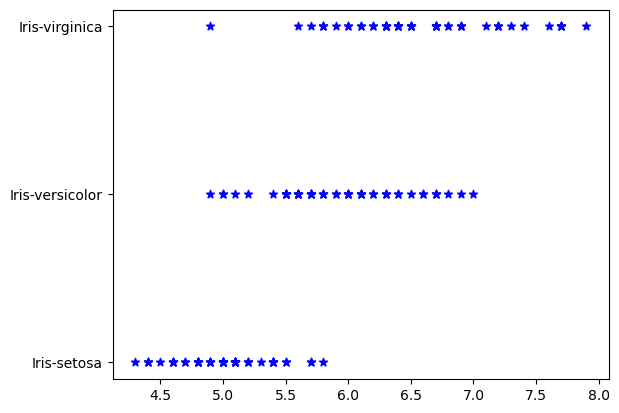

In [52]:
plt.scatter(df.sepal_length,df.species,marker='*',color='blue')
# notice that iris versicolor has normal sepal length but iris virginica has greater sepal length

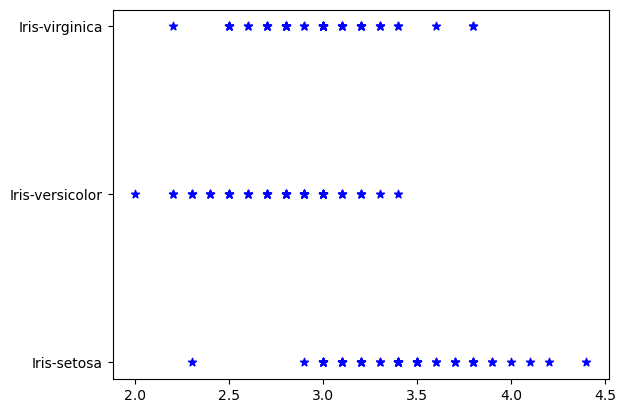

In [53]:
plt.scatter(df.sepal_width,df.species,marker='*',color='blue')

In [54]:
df.shape #150 rows and 5 cols 0 - split to test and train

(150, 5)

In [55]:
# Utilise corelation coefficient to eliminate variables

In [56]:
df.corr()

/tmp/ipykernel_32/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [57]:
#We can remove petal length - CC closer to 1 with sepal length and petal width

In [58]:
# preprocessing data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head(150)

# species is in categorical format we convert it to numerical - 
# 0 : setosa
# 1 : versicolor
# 2 : virginica

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [59]:
df.columns
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [60]:
# X axis - all columns except species

X=df.drop(df.columns[[2,4]], axis = 1)
print(X)



     sepal_length  sepal_width  petal_width
0             5.1          3.5          0.2
1             4.9          3.0          0.2
2             4.7          3.2          0.2
3             4.6          3.1          0.2
4             5.0          3.6          0.2
..            ...          ...          ...
145           6.7          3.0          2.3
146           6.3          2.5          1.9
147           6.5          3.0          2.0
148           6.2          3.4          2.3
149           5.9          3.0          1.8

[150 rows x 3 columns]


In [61]:
Y = df['species']

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.20)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [70]:
X_test

,sepal_length,sepal_width,petal_width
20,5.4,3.4,0.2
63,6.1,2.9,1.4
2,4.7,3.2,0.2
44,5.1,3.8,0.4
16,5.4,3.9,0.4
75,6.6,3.0,1.4
80,5.5,2.4,1.1
124,6.7,3.3,2.1
93,5.0,2.3,1.0
36,5.5,3.5,0.2


In [72]:
X_train

,sepal_length,sepal_width,petal_width
119,6.0,2.2,1.5
116,6.5,3.0,1.8
98,5.1,2.5,1.1
9,4.9,3.1,0.1
86,6.7,3.1,1.5
...,...,...,...
70,5.9,3.2,1.8
11,4.8,3.4,0.2
132,6.4,2.8,2.2
6,4.6,3.4,0.3


In [71]:
model.fit(X_train,Y_train)

LogisticRegression()

In [74]:
model.predict(X_test)
print(model.score(X_test,Y_test)*100)

93.33333333333333
